In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [4]:
# Load the dataset
url = "adult_dataset.csv"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, names=columns, na_values=' ?')

In [5]:
data.dropna(inplace=True)


In [6]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [7]:
X = data.drop('income', axis=1)
y = data['income']

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [11]:
accuracy_scores = []

In [12]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [13]:
accuracy_without_pca = accuracy_score(y_test, y_pred)
accuracy_scores.append(accuracy_without_pca)

In [14]:
print("Logistic Regression without PCA")
print(f"Accuracy: {accuracy_without_pca:.4f}")
print(classification_report(y_test, y_pred))


Logistic Regression without PCA
Accuracy: 0.7881
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      7414
           1       0.62      0.32      0.42      2355

    accuracy                           0.79      9769
   macro avg       0.72      0.63      0.64      9769
weighted avg       0.77      0.79      0.76      9769



In [15]:
pca_all = PCA()
X_train_pca_all = pca_all.fit_transform(X_train)
X_test_pca_all = pca_all.transform(X_test)

In [16]:
log_reg_pca_all = LogisticRegression()
log_reg_pca_all.fit(X_train_pca_all, y_train)
y_pred_pca_all = log_reg_pca_all.predict(X_test_pca_all)


In [17]:
accuracy_pca_all = accuracy_score(y_test, y_pred_pca_all)
accuracy_scores.append(accuracy_pca_all)

In [18]:
print("\nLogistic Regression with PCA (whole dataset)")
print(f"Accuracy: {accuracy_pca_all:.4f}")
print(classification_report(y_test, y_pred_pca_all))



Logistic Regression with PCA (whole dataset)
Accuracy: 0.7881
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      7414
           1       0.62      0.32      0.42      2355

    accuracy                           0.79      9769
   macro avg       0.72      0.63      0.64      9769
weighted avg       0.77      0.79      0.76      9769



In [19]:
pca_50 = PCA(0.5)  # Retain components that explain 50% of the variance
X_train_pca_50 = pca_50.fit_transform(X_train)
X_test_pca_50 = pca_50.transform(X_test)


In [20]:
log_reg_pca_50 = LogisticRegression()
log_reg_pca_50.fit(X_train_pca_50, y_train)
y_pred_pca_50 = log_reg_pca_50.predict(X_test_pca_50)


In [21]:
accuracy_pca_50 = accuracy_score(y_test, y_pred_pca_50)
accuracy_scores.append(accuracy_pca_50)


In [22]:
print("\nLogistic Regression with PCA (variance explained ≥ 0.5)")
print(f"Accuracy: {accuracy_pca_50:.4f}")
print(classification_report(y_test, y_pred_pca_50))


Logistic Regression with PCA (variance explained ≥ 0.5)
Accuracy: 0.7804
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      7414
           1       0.59      0.29      0.39      2355

    accuracy                           0.78      9769
   macro avg       0.70      0.61      0.63      9769
weighted avg       0.75      0.78      0.75      9769



In [23]:
pca_75 = PCA(0.75)  # Retain components that explain 75% of the variance
X_train_pca_75 = pca_75.fit_transform(X_train)
X_test_pca_75 = pca_75.transform(X_test)

In [24]:
log_reg_pca_75 = LogisticRegression()
log_reg_pca_75.fit(X_train_pca_75, y_train)
y_pred_pca_75 = log_reg_pca_75.predict(X_test_pca_75)


In [25]:
accuracy_pca_75 = accuracy_score(y_test, y_pred_pca_75)
accuracy_scores.append(accuracy_pca_75)

In [26]:
print("\nLogistic Regression with PCA (variance explained ≥ 0.75)")
print(f"Accuracy: {accuracy_pca_75:.4f}")
print(classification_report(y_test, y_pred_pca_75))


Logistic Regression with PCA (variance explained ≥ 0.75)
Accuracy: 0.7883
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      7414
           1       0.63      0.30      0.41      2355

    accuracy                           0.79      9769
   macro avg       0.72      0.62      0.64      9769
weighted avg       0.77      0.79      0.76      9769



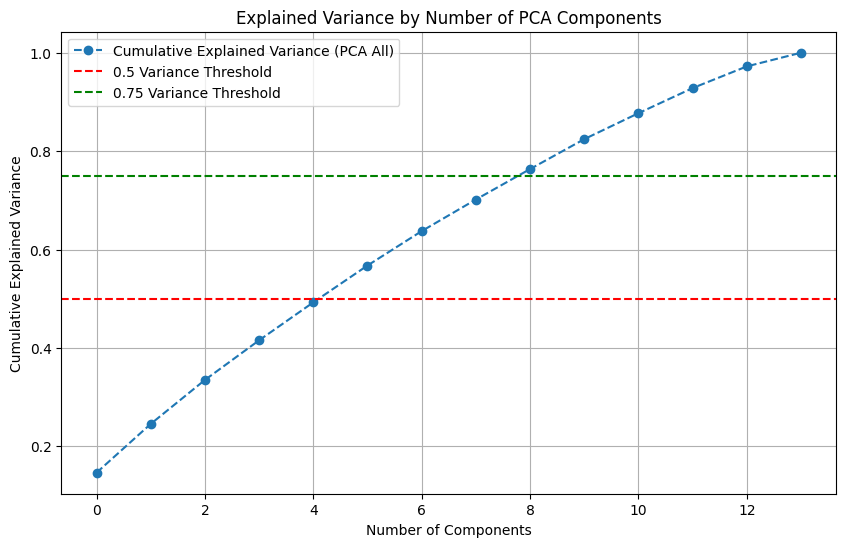

In [27]:
# Plotting Explained Variance for Each Scenario
plt.figure(figsize=(10, 6))
explained_variance = np.cumsum(pca_all.explained_variance_ratio_)
plt.plot(explained_variance, marker='o', linestyle='--', label='Cumulative Explained Variance (PCA All)')
plt.axhline(y=0.5, color='r', linestyle='--', label='0.5 Variance Threshold')
plt.axhline(y=0.75, color='g', linestyle='--', label='0.75 Variance Threshold')
plt.title('Explained Variance by Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend(loc='best')
plt.grid(True)
plt.show()

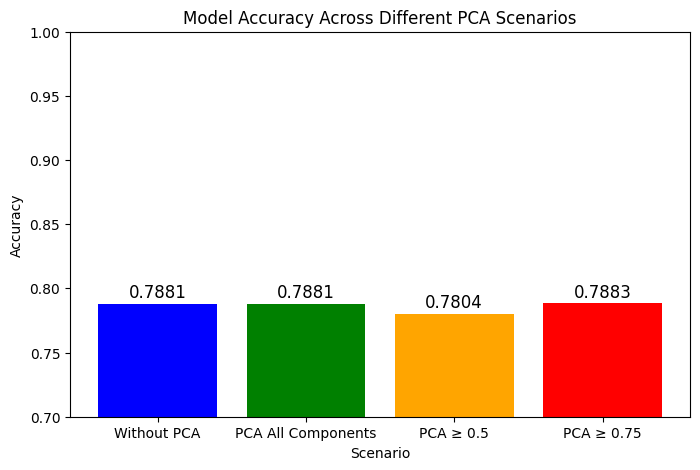

In [28]:
# Accuracy Comparison Graph
plt.figure(figsize=(8, 5))
scenarios = ['Without PCA', 'PCA All Components', 'PCA ≥ 0.5', 'PCA ≥ 0.75']
plt.bar(scenarios, accuracy_scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Accuracy Across Different PCA Scenarios')
plt.xlabel('Scenario')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=12)
plt.show()

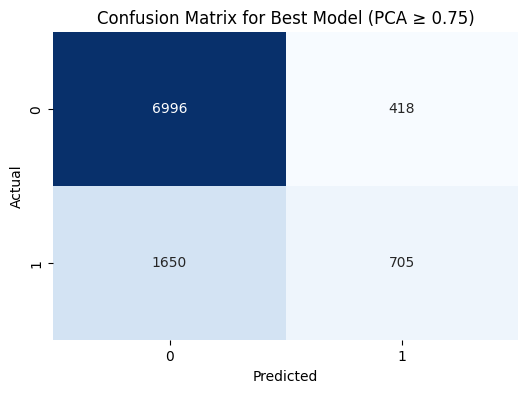

In [29]:
# Confusion Matrix for the Best Model (You can choose the best model here)
best_model_conf_matrix = confusion_matrix(y_test, y_pred_pca_75)

plt.figure(figsize=(6, 4))
sns.heatmap(best_model_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Best Model (PCA ≥ 0.75)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
